In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  %tensorflow_version 2.x
except Exception:
  pass

In [3]:
from IPython.display import Image

import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, LSTM
from tensorflow.keras.models import Model
import numpy as np

# 항상 같은 결과를 갖기 위해 랜덤 시드 설정
tf.random.set_seed(1)
np.random.seed(1)

# LSTM
LSTM은 gradient vanishing 또는 gradient exploding과 같은 기존 RNN의 단점을 극복하고자 만들어진 조금 더 진화된 RNN 셀입니다. LSTM 셀 내부를 살펴보면 기존 RNN의 단점을 극복하기 위해 이전 정보를 지우거나 기억하기 위한 로직과 현재 정보를 기억하기 위한 로직이 구현되어 있습니다.  
아래 그림에서 보시면 기존 RNN에서 보지 못했던 주황색 선과 조금 더 많아진 활성화함수와 수학 기호들을 보실 수 있습니다. 주황색 선은 메모리 셀이라고 부릅니다. 주황색 선상의 곱하기 기호에서, 0부터 1까지의 값인 시그모이드 출력값이 곱해지게 되어, 메모리 셀의 기존 정보를 어느정도까지 기억할 지 결정하게 됩니다. 주황색 선상의 더하기 기호는 새로운 정보를 메모리셀의 기존 정보에 더하는 로직입니다. 그리고 **h**t 선상의 곱하기 기호에서 메모리셀의 정보와 현재 정보가 함께 계산되어 상태값을 출력하는 것을 확인할 수 있습니다.

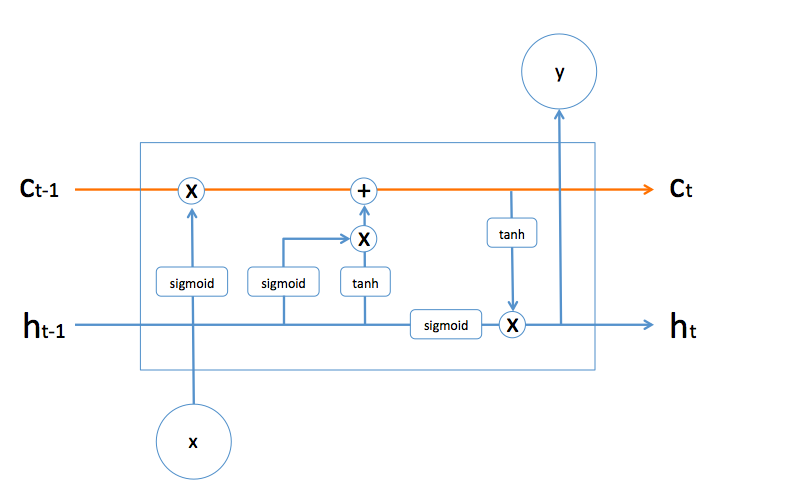

In [5]:
Image("lstm_detail.png", width=500, height=250)

텐서플로우 사용 시, 이미 LSTM은 구현되어 있기 때문에 직접 위 그림을 구현하실 필요는 없습니다.  
텐서플로우 LSTM을 사용 시 아래 그림만 잘 이해하셔도, 사용에 큰 무리가 없습니다.

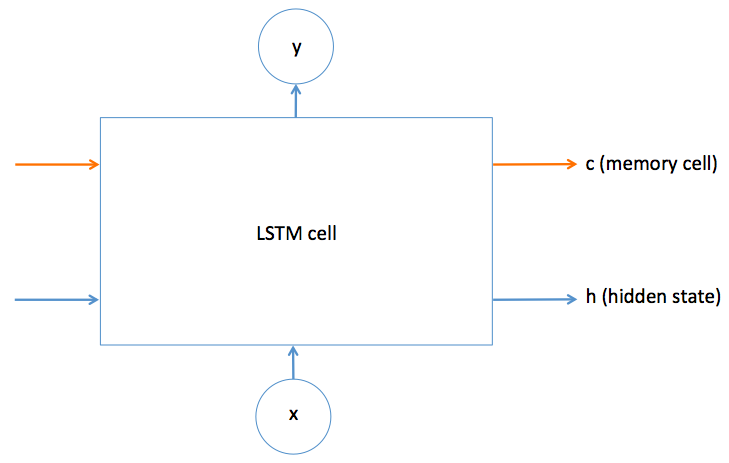

In [6]:
Image("lstm_cell2.png", width=500, height=250)

아래 코드를 실행하여 LSTM의 출력값(y) 및 상태값(hidden state), 메모리셀(memory cell)값을 출력할 수 있습니다.

In [16]:
# 입력값의 형태를 지정합니다.
inputs = Input(shape=(1,2))
"""
RNN 셀의 속성을 지정합니다.
1: 1차원 벡터의 출력값 지정합니다.
return_state=True: LSTM 셀의 상태값, 메모리셀을 출력하도록 지정합니다.
"""
lstm_out, hidden_state, cell_state = LSTM(1, return_state=True)(inputs)
model = Model(inputs=inputs, outputs=[lstm_out, hidden_state, cell_state])

In [17]:
data = np.array([
    [ [1,0] ]
])

In [20]:
# 출력값, 상태값, 메모리셀 프린트
lstm_out, hidden_state, cell_state  = model.predict(data)
print("lstm_out: ",lstm_out)
print("hidden_state: ",hidden_state)
print("cell_state: ",cell_state)

lstm_out:  [[0.06527668]]
hidden_state:  [[0.06527668]]
cell_state:  [[0.10195579]]
